## Business Case: Build a classifier model to predict the credit card defaulter for given dataset
## Task: Credit Card Defaulter Dataset


# 1. 1.	Import Libraries/Dataset 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#data wrangling libraries
import numpy as np
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#machine learning libraries
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#importing metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_predict



In [2]:
#Importing the dataset
df=pd.read_csv("/content/credit_card_defaulter.csv")

In [3]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [4]:
#Dropping the unnecessary column Unnamed: 0
df=df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


### There are total 4 columns, 10000 entries and datatypes are object and float, memory usage is 312.6+ KB

In [7]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
default,10000,2,No,9667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
student,10000,2,No,7056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,10000.0,NaN,NaN,NaN,835.374886,483.714985,0.0,481.731105,823.636973,1166.308387,2654.322576
income,10000.0,NaN,NaN,NaN,33516.981876,13336.639563,771.967729,21340.462905,34552.6448,43807.729275,73554.2335


#### The mean balance is 835.374886 and mean income is 33516.981876. the standard deviation for balance is 483.714985 and standards deviation for income is 13336.693563.

# 2. Data Visualisation and Augmentation 

## Exploratory Data Analysis to understand the data

In [8]:
#we obtain the coulmns in the dataset
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [9]:
#separating out categorical features through a function
cat_feat=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feat)

['default', 'student']


In [10]:
df[['default', 'student']].head()

,default,student
0,No,No
1,No,Yes
2,No,No
3,No,No
4,No,No


In [11]:
#the number of observations in each category for default
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

We observe that the target column is imbalanced.So we need to balance it using smote technique or we can use stratified K fold which works for imbalanced dataset.

In [12]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

<Axes: >

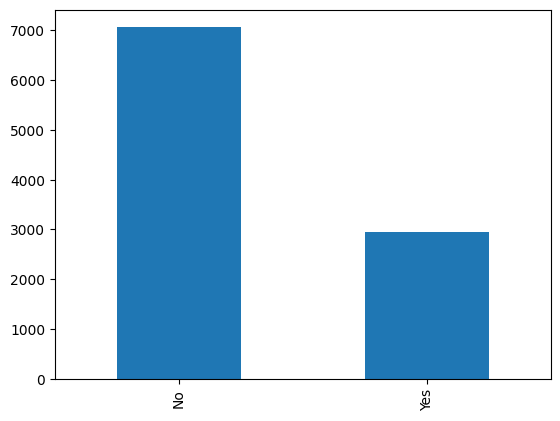

In [13]:
df["student"].value_counts().plot(kind="bar")

<Axes: >

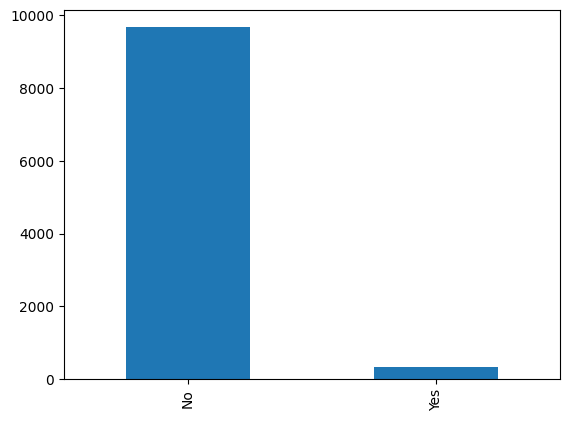

In [14]:
df["default"].value_counts().plot(kind="bar")

#### Observations from the categorical columns in the dataset
1. We observe that there are two categories for default as well as student. 
2. The default feature is clearly unbalanced with majority observations under default
3. The number of students are much less than the non-students

In [15]:
#numerical features in the dataset
num_feat=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feat)

['balance', 'income']


In [16]:
#We see the observations with only numerical columns
df[['balance','income']].head()

,balance,income
0,729.526495,44361.62507
1,817.180407,12106.13470
2,1073.549164,31767.13895
3,529.250605,35704.49394
4,785.655883,38463.49588


<Figure size 800x500 with 0 Axes>

<ipython-input-17-337c99676ae0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],hist=True,kde=True)


<Axes: xlabel='balance', ylabel='Density'>

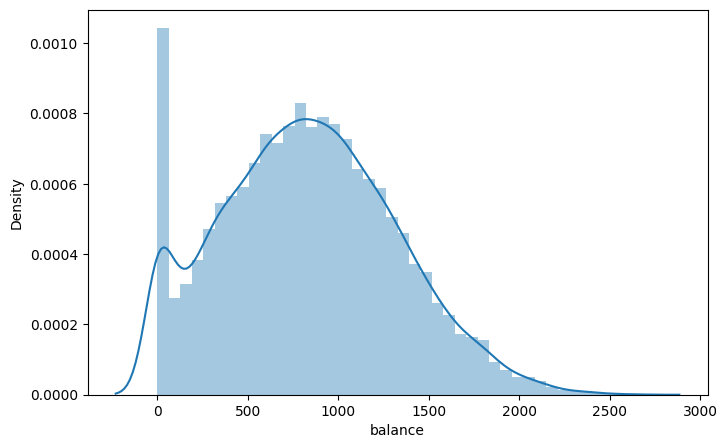

<Figure size 800x500 with 0 Axes>

<ipython-input-17-337c99676ae0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],hist=True,kde=True)


<Axes: xlabel='income', ylabel='Density'>

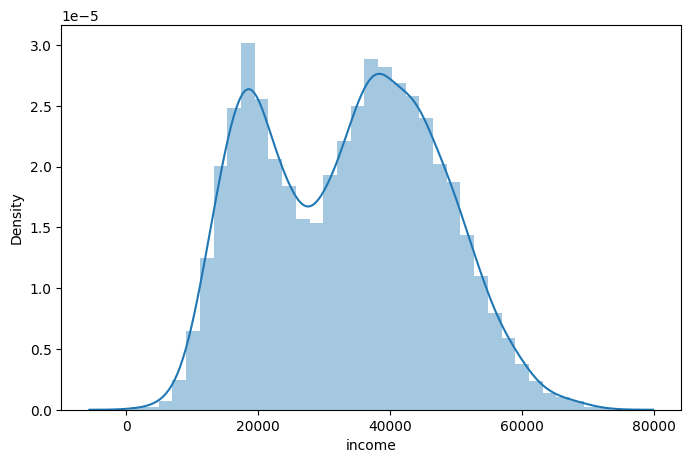

In [17]:
num_feat=[feature for feature in num_feat ]
for feature in num_feat :
    plt.figure(figsize = (8, 5))
    sns.distplot(df[feature],hist=True,kde=True)
    plt.show()

#### Observations:
1. We find that the distribution of income is bimodal

#### Now we try to check the relation between all the and our Target variable which is 'default'

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='student', ylabel='count'>

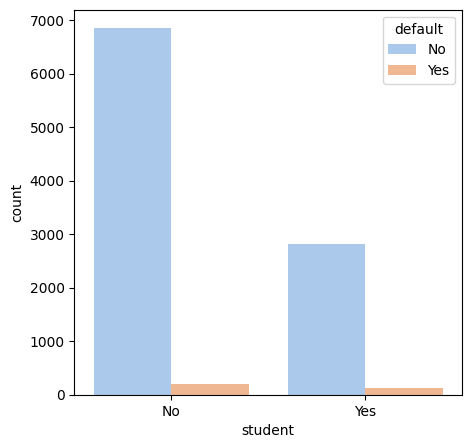

In [18]:
plt.figure(figsize = (5, 5))
sns.countplot(x=df['student'],hue=df['default'],palette='pastel')
plt.show()

### Observations:
1. We see in the non-defaulter group , the number of students is very low. 
2. While in the default group, the number of students and non-students are more or less equal


<Figure size 500x500 with 0 Axes>

<Axes: xlabel='default', ylabel='balance'>

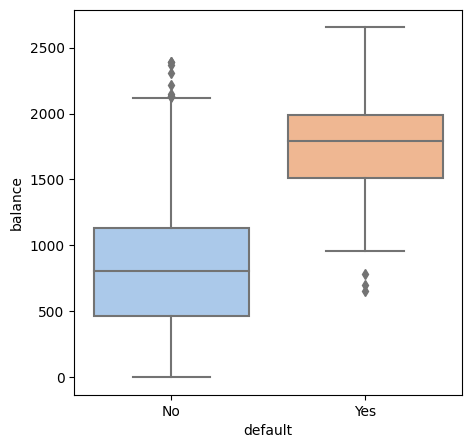

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='default', ylabel='income'>

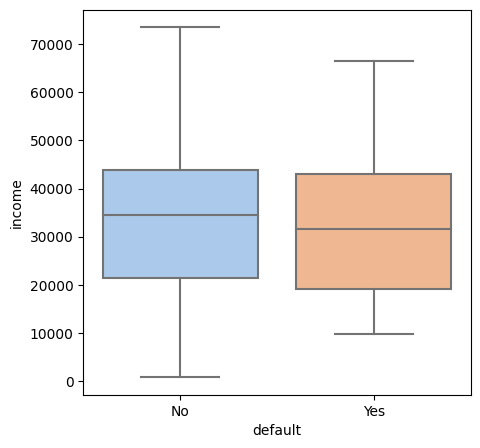

In [19]:
num_feat=[feature for feature in num_feat ]
for feature in num_feat:
    plt.figure(figsize = (5, 5))
    sns.boxplot(x=df['default'],y=df[feature],palette='pastel')
    plt.show()

#### Observations:
1. The median balance of defaulters are much more than that of non-defaulters
2. We find that the median income of both defaulters and non-defaulters are more or less similar.
3. There are presence of outliers in balance for both defaulters and non-defaulters

### Now we prepare our data for further analysis:
1. Check for null values
2. Remove the outliers
3. Convert categorical variables into label encoders
4. Scaling our data
5. separate the data into training and testing set

In [20]:
# Check for null values
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

##### No null values are present

In [21]:
q1,q3=np.percentile(df['balance'],[25,75])
q1
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
len(df[(df['balance']<=upper_bound)&(df['balance']>=lower_bound)])/len(df)

481.73110505

0.9969

In [22]:
##nearly 1 % of my data is outlier, so we remove the outlier
df=df[(df['balance']<=upper_bound)&(df['balance']>=lower_bound)]
df.reset_index(drop=True,inplace=True)

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='default', ylabel='balance'>

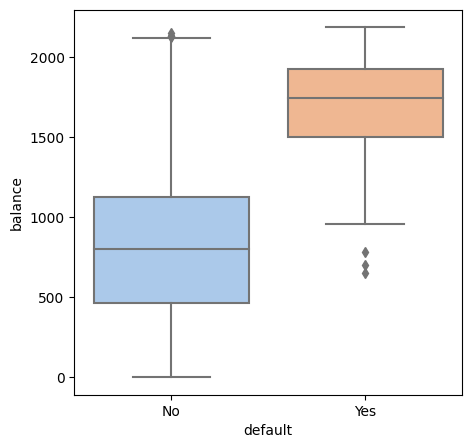

In [23]:
plt.figure(figsize = (5, 5))
sns.boxplot(x=df['default'],y=df['balance'],palette='pastel')
plt.show()

#### Now we perform Label encoding

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['default']= label_encoder.fit_transform(df['default'])
df['default'].unique()

array([0, 1])

In [25]:
df['student']= label_encoder.fit_transform(df['student'])
df['student'].unique()

array([0, 1])

In [26]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


#### segregating the data into target variable and independent variables

In [27]:
X = df.drop('default',axis=1) # Features for predicting
y = df['default'] # Target class

### 3.Random Forest Classifier Model Building 
  1. • Build a random forest classification model
  2. • Train the model on the train dataset 
  3. • Print the model summary


In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score



# Instantiate the SMOTE object for oversampling the minority class
sm = SMOTE(random_state=42)

# Perform SMOTE oversampling on the entire dataset
X_resampled, y_resampled = sm.fit_resample(X, y)

# Define the number of folds for stratified k-fold cross-validation
k_folds = 5

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X_resampled, y_resampled):
    # Split the resampled data into training and test sets
    X_train, X_test = X_resampled.loc[train_index], X_resampled.loc[test_index]
    y_train, y_test = y_resampled.loc[train_index], y_resampled.loc[test_index]

    # Train the Random Forest classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred = rf_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the average score across all folds
avg_score = sum(scores) / k_folds

print("Average accuracy score: {:.2f}".format(avg_score))


RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42)

Average accuracy score: 0.93


<Axes: >

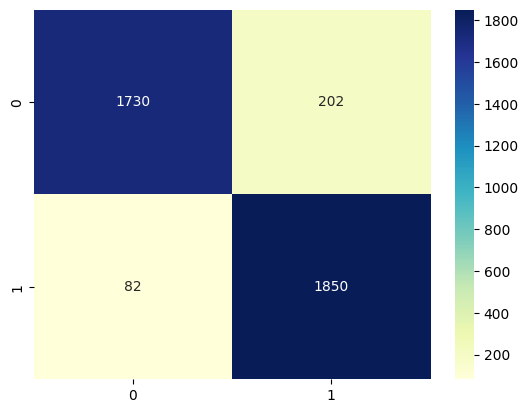

In [29]:
# Model evaluation
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='d')


### 5a. Model Evaluation: Random Forest :Check the random forest classifier model’s performance by printing accuracy, confusion matrix, F1 score and the AUC-ROC curve 


In [30]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))
print("Precision Score is",precision_score(y_test,y_pred))
print("Recall Score is",recall_score(y_test,y_pred))
print("\n")
print("Classification report: \n", classification_report(y_test,y_pred))
print("ROC_AUC score: ",roc_auc_score(y_test,y_pred))

Accuracy Score:  0.9265010351966874
F1 Score:  0.928714859437751
Precision Score is 0.9015594541910331
Recall Score is 0.9575569358178054


Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1932
           1       0.90      0.96      0.93      1932

    accuracy                           0.93      3864
   macro avg       0.93      0.93      0.93      3864
weighted avg       0.93      0.93      0.93      3864

ROC_AUC score:  0.9265010351966874


#### Model summary
1. Accuracy score of our model is 97%. so our model 97% correctly predicts out of total predictions.
   But we cannot conclude our result since our data has imbalanced class. So we look for precision,recall and f1-score    in our data
2. The precision and recall scores are 65% and 29% respectively.
3. F1 score is the harmonic mean of precision and recall, and it performs well on imbalanced dataset as  it takes both false positive and false negative into account. The F1 score is 40 %
4. The ROC_AUC Score is 64.4%

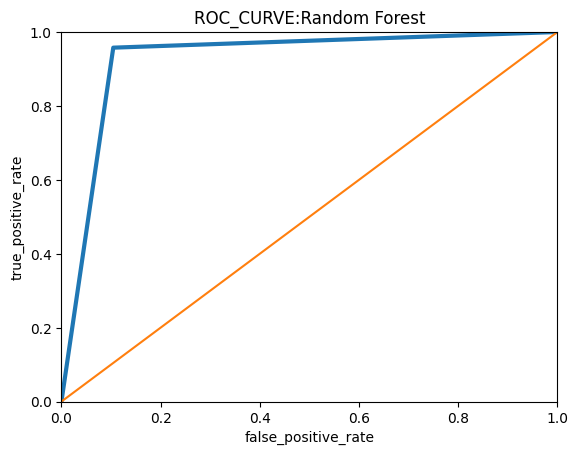

In [31]:
from sklearn.metrics import roc_curve
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, y_pred)
# Plotting the ROC curve for Random Forest model
def plot_roc_curve(fpr_rfc,tpr_rfc):
    plt.plot(fpr_rfc,tpr_rfc,linewidth=3)
    plt.plot([0,1],'-')
    plt.axis([0,1,0,1])
    plt.xlabel("false_positive_rate")
    plt.ylabel("true_positive_rate")
    plt.title("ROC_CURVE:Random Forest")
plot_roc_curve(fpr_rfc,tpr_rfc)

### 4. XGBoost Classifier Model Building 
1.  Build a XGBoost classification Model
2.  Train the model on the Train Data Set 
3.  Print the model summary


In [32]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Assume X and y are your feature matrix and target variable, respectively

# Instantiate the SMOTE object for oversampling the minority class
sm = SMOTE(random_state=42)

# Perform SMOTE oversampling on the entire dataset
X_resampled, y_resampled = sm.fit_resample(X, y)

# Define the number of folds for stratified k-fold cross-validation
k_folds = 5

# Instantiate the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X_resampled, y_resampled):
    # Split the resampled data into training and test sets
    X_train, X_test = X_resampled.loc[train_index], X_resampled.loc[test_index]
    y_train, y_test = y_resampled.loc[train_index], y_resampled.loc[test_index]

    # Train the XGBoost classifier on the training data
    xgb_classifier.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred_xg = xgb_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred_xg)
    scores.append(score)

# Calculate the average score across all folds
avg_score = sum(scores) / k_folds

print("Average accuracy score: {:.2f}".format(avg_score))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Average accuracy score: 0.93


In [33]:
#comparing predicted and actual test values 
df_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xg})
df_xgb.head()

,Actual,Predicted
8,0,0
14,0,0
23,0,0
37,0,0
40,0,0


<Axes: >

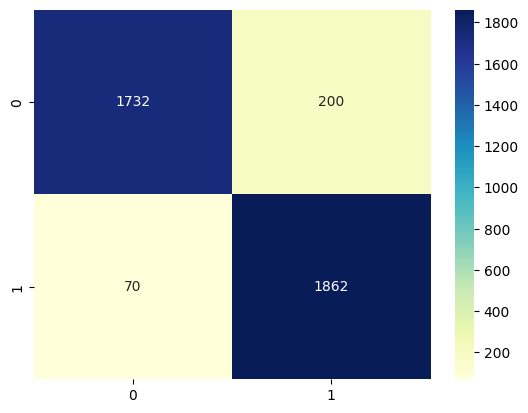

In [34]:
#Model Summary

cm=confusion_matrix(y_test,y_pred_xg)
sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='d')



### 5b. Model Evaluation : XGBOOST:Check the random forest classifier model’s performance by printing accuracy, confusion matrix, F1 score and the AUC-ROC curve 


In [35]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_xg))
print("F1 Score: ", f1_score(y_test,y_pred_xg))
print("Precision Score is",precision_score(y_test,y_pred_xg))
print("Recall Score is",recall_score(y_test,y_pred_xg))
print("\n")
print("Classification report: \n", classification_report(y_test,y_pred_xg))
print("ROC_AUC score: ",roc_auc_score(y_test,y_pred_xg))

Accuracy Score:  0.9301242236024845
F1 Score:  0.9323985978968452
Precision Score is 0.9030067895247332
Recall Score is 0.9637681159420289


Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1932
           1       0.90      0.96      0.93      1932

    accuracy                           0.93      3864
   macro avg       0.93      0.93      0.93      3864
weighted avg       0.93      0.93      0.93      3864

ROC_AUC score:  0.9301242236024844


#### Model summary
1. The accuracy score is 97%. Thus our model correctly predicts 97% of the samples.But in case of imbalanced class accuracy is not a correct measure. So we look for precision, recall and F1 score.
2. The precision is 66% and recall is 31 %.
3. The F1 score is the Harmonic mean of precision and recall and is a good measure for imbalanced class. The F1 score is 42%.
4. The ROC_AUC score is 65.15%

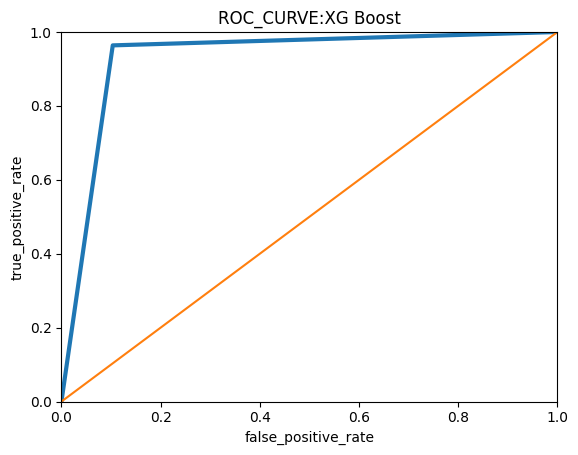

In [36]:
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, y_pred_xg)
# Plotting the ROC curve for Random Forest model
def plot_roc_curve(fpr_xgb,tpr_xgb):
    plt.plot(fpr_xgb,tpr_xgb,linewidth=3)
    plt.plot([0,1],'-')
    plt.axis([0,1,0,1])
    plt.xlabel("false_positive_rate")
    plt.ylabel("true_positive_rate")
    plt.title("ROC_CURVE:XG Boost")
plot_roc_curve(fpr_xgb,tpr_xgb)

### 6. Compare the performance of random forest classification and XGBoost classification models for given dataset 

In [37]:
print("ROC_AUC score for Random Forest Classifier is: ",roc_auc_score(y_test,y_pred))
print("ROC_AUC score for XgBoost Classifier is : ",roc_auc_score(y_test,y_pred_xg))
print("\n")
print("Accuracy Score for random Forest: ",accuracy_score(y_test,y_pred))
print("F1 Score for Random forest: ", f1_score(y_test,y_pred))
print("\n")
print("Accuracy Score for Xg Boost: ",accuracy_score(y_test,y_pred_xg))
print("F1 Score for Xg boost: ", f1_score(y_test,y_pred_xg))

ROC_AUC score for Random Forest Classifier is:  0.9265010351966874
ROC_AUC score for XgBoost Classifier is :  0.9301242236024844


Accuracy Score for random Forest:  0.9265010351966874
F1 Score for Random forest:  0.928714859437751


Accuracy Score for Xg Boost:  0.9301242236024845
F1 Score for Xg boost:  0.9323985978968452


### Conclusion Summary:
1. We can conclude that XgBoost model is better compared to the Random forest Classifier model.
2. The ROC_AUC score is better for XgBoost compared to the Random forest Classifier
3. Although the accuracy scores are same but we cannot base our conclusion on accuracy scores as our dataset in imbalanced.
4. The F1 score is better metric for imbalanced data and it also indicated that XGBoost is slightly better compared to random forest.


#### Deployment 

In [38]:
import pickle

In [39]:
with open("rf_model","wb") as f:
  pickle.dump(rf_classifier,f)

In [40]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


In [41]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.4 MB/s eta 0:00:00
  Preparing metad

In [42]:
import gradio as gr

In [43]:
def make_prediction( student, balance, income):
    with open("rf_model", "rb") as f:
        rf_classifier  = pickle.load(f)
        preds = rf_classifier.predict([[student, balance, income]])
    if preds == 1:
            return "You are eligible for the loan"
    return "You are not eligible for the loan"

#Create the input component for Gradio since we are expecting 3 inputs

student_input = gr.Number(label = "Enter whether student or not{1:Student,0: Non Student}")
bank_balance = gr.Number(label = "Enter Bank balance:")
income = gr.Number(label = "Enter your income:")
# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[student_input, bank_balance, income], outputs=output,
                        examples=[[0,967.4827,33055.11],[1,2400,11000]],
    description="flag if you find any errorneous output",
    flagging_options=["yes","no","maybe"],
    theme=gr.themes.Soft())
app.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [44]:
with open("xg_model","wb") as f:
  pickle.dump(xgb_classifier,f)

In [45]:
def make_prediction( student, balance, income):
    with open("xg_model", "rb") as f:
        xgb_classifier  = pickle.load(f)
        preds = rf_classifier.predict([[student, balance, income]])
    if preds == 1:
            return "You are eligible for the loan"
    return "You are not eligible for the loan"

#Create the input component for Gradio since we are expecting 3 inputs

student_input = gr.Number(label = "Enter whether student or not{1:Student,0: Non Student}")
bank_balance = gr.Number(label = "Enter Bank balance:")
income = gr.Number(label = "Enter your income:")
# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[student_input, bank_balance, income], outputs=output,
                        examples=[[0,967.4827,33055.11],[1,2400,11000]],
    description="flag if you find any errorneous output",
    flagging_options=["yes","no","maybe"],
    theme=gr.themes.Soft())
app.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>